**IMPORT RELEVANT LIBRARIES**

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # converts jpeg or png image files to vector arrays

from sklearn.cluster import KMeans

**READ IN THE IMAGE**

In [6]:
img_array = mpimg.imread('palm_trees.jpg')

**DISPLAY IMAGE AS ARRAY OR EXACT IMAGE**

In [7]:
img_array

array([[[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 23,  63,  99],
        [ 51,  91, 127],
        [ 50,  90, 126]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 31,  71, 107],
        [ 48,  88, 124],
        [ 47,  90, 125]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 39,  79, 115],
        [ 42,  85, 120],
        [ 44,  88, 123]],

       ...,

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [  9,   9,  11],
        [  9,   9,  11]],

       [[  3,   3,   5],
        [  3,   3,   5],
        [  3,   3,   5],
        ...,
        [  8,   8,  10],
        [  8,   8,  10],
        [  8,   8,  10]],

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [ 10,  10,  12],
        [ 10,  10,  12]]

In [8]:
img_array.shape

(1401, 934, 3)

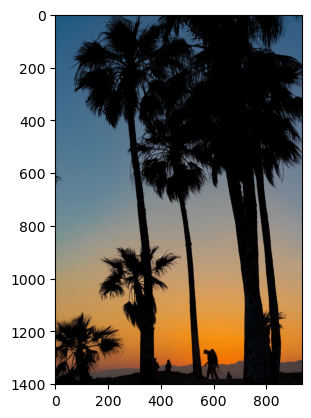

In [9]:
img = plt.imshow(img_array)

**FLATTEN THE IMAGE TO A 2D-ARRAY (H*W, C)**

In [10]:
(h,w,c) = img_array.shape

In [11]:
h

1401

In [12]:
w

934

In [13]:
c

3

In [20]:
img_2D_Array = img_array.reshape(h*w,c)

In [21]:
img_2D_Array 

array([[ 25,  89, 127],
       [ 25,  89, 127],
       [ 25,  89, 127],
       ...,
       [  9,   9,  11],
       [ 10,  10,  12],
       [ 10,  10,  12]], dtype=uint8)

In [22]:
len(img_2D_Array.shape)

2

**CREATE THE K-MEANS MODEL**

In [19]:
KMeans_Model = KMeans(n_clusters=6)

In [23]:
labels = KMeans_Model.fit_predict(img_2D_Array)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [24]:
labels

array([3, 3, 3, ..., 1, 1, 1])

**CHECK THE MODEL CLUSTER CENTERS**

In [26]:
Model_Cluster_Center = KMeans_Model.cluster_centers_

In [27]:
Model_Cluster_Center

array([[219.02705631, 135.42601028,  47.00246854],
       [  2.75659154,   2.57529968,   3.70012508],
       [136.79938905, 143.76519829, 143.9563427 ],
       [ 71.12526864, 109.27679682, 137.69417556],
       [191.52439482, 154.52861278, 109.57441868],
       [ 67.25337203,  61.54496264,  62.01242432]])

**CONVERT THE CLUSTER CENTERS INTO RGB COLOR CODES**

In [28]:
rgb_codes = Model_Cluster_Center.round(0).astype(int)

In [29]:
rgb_codes

array([[219, 135,  47],
       [  3,   3,   4],
       [137, 144, 144],
       [ 71, 109, 138],
       [192, 155, 110],
       [ 67,  62,  62]])

**ASSIGN THE COLOR CODES BACK TO THE LABELS AND RESHAPE TO 3D**

In [30]:
quantized_image = np.reshape(rgb_codes[labels],(h,w,c))

In [31]:
quantized_image

array([[[ 71, 109, 138],
        [ 71, 109, 138],
        [ 71, 109, 138],
        ...,
        [ 67,  62,  62],
        [ 71, 109, 138],
        [ 71, 109, 138]],

       [[ 71, 109, 138],
        [ 71, 109, 138],
        [ 71, 109, 138],
        ...,
        [ 67,  62,  62],
        [ 71, 109, 138],
        [ 71, 109, 138]],

       [[ 71, 109, 138],
        [ 71, 109, 138],
        [ 71, 109, 138],
        ...,
        [ 71, 109, 138],
        [ 71, 109, 138],
        [ 71, 109, 138]],

       ...,

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]],

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]],

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]]

**DISPLAY QUANTIZED IMAGE**

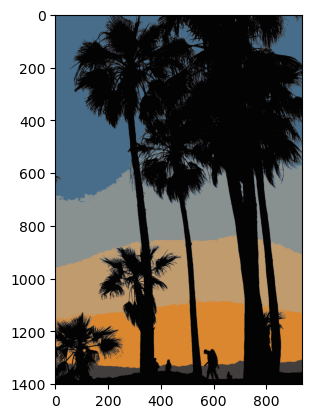

In [32]:
img = plt.imshow(quantized_image)